In [62]:
import os


In [63]:
len(os.listdir('COVID-19_Radiography_Dataset/Pneumonia/images'))

1345

In [64]:
import cv2

In [65]:
img = cv2.imread('COVID-19_Radiography_Dataset/Pneumonia/images/Viral Pneumonia-1.png')

In [66]:
import matplotlib.pyplot as plt

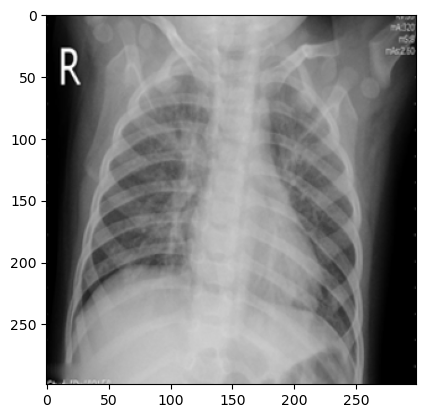

In [67]:
plt.imshow(img)

In [68]:
img.shape

(299, 299, 3)

In [69]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_excel('COVID-19_Radiography_Dataset/Pneumonia.metadata.xlsx')

In [71]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [72]:
urls = os.listdir('COVID-19_Radiography_Dataset/Pneumonia/images')

In [73]:
path = "COVID-19_Radiography_Dataset/Pneumonia/images/" + urls[0]

In [74]:
path

'COVID-19_Radiography_Dataset/Pneumonia/images/Viral Pneumonia-1.png'

In [75]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [76]:
Pneumonia_path = "COVID-19_Radiography_Dataset/Pneumonia/images"
PneumoniaUrl = os.listdir(Pneumonia_path)
PneumoniaImages, PneumoniaTargets = loadImages(Pneumonia_path, PneumoniaUrl, 1)

In [77]:
len(PneumoniaUrl), len(PneumoniaImages)

(1345, 1345)

In [78]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [79]:
PneumoniaImages.shape

(1345, 100, 100, 3)

In [80]:
normalImages.shape

(10192, 100, 100, 3)

In [81]:
data = np.r_[PneumoniaImages, normalImages]

In [82]:
data.shape

(11537, 100, 100, 3)

In [83]:
targets = np.r_[PneumoniaTargets, normalTargets]

In [84]:
targets.shape


(11537,)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [87]:
import tensorflow as tf

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [89]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\y2jsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 959,137 (3.66 MB)

 Trainable params: 959,137 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [92]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - accuracy: 0.8865 - loss: 0.2595 - val_accuracy: 0.9539 - val_loss: 0.1137
Epoch 2/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9677 - loss: 0.0830 - val_accuracy: 0.9695 - val_loss: 0.0826
Epoch 3/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9809 - loss: 0.0534 - val_accuracy: 0.9847 - val_loss: 0.0442
Epoch 4/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9843 - loss: 0.0535 - val_accuracy: 0.9858 - val_loss: 0.0440
Epoch 5/5
271/271 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9879 - loss: 0.0340 - val_accuracy: 0.9778 - val_loss: 0.0608


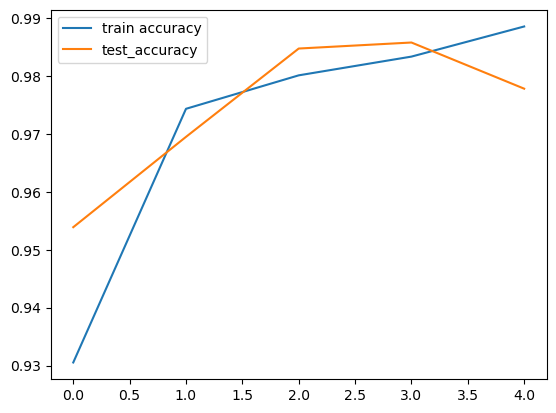

In [93]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

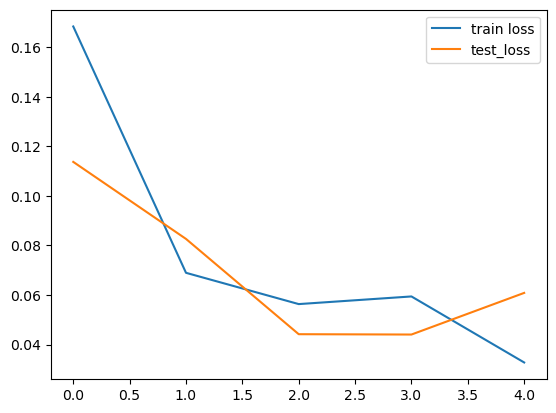

In [94]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()